### Chatbot seesion:

https://chatgpt.com/share/67351a15-8e38-800d-b361-c08fbefa6b16

In [ ]:
"""Question 4"""

The apparent contradiction comes down to two different things the model is showing:

Low R-squared (17.6%): This means the model doesn’t capture much of the overall variability in HP; other factors not in the model likely influence HP a lot.

Significant coefficients: Even though the model doesn’t explain much of HP overall, the predictors included are still statistically significant and strongly associated with HP.

the model’s predictors have a strong relationship with HP, but they don’t explain most of the variation in HP. This happens when the model is missing other key variables that affect HP.

In [ ]:
"""Question 7"""

Model 3: This is a simple starting model that predicts HP using only Attack and Defense. It gives a basic picture of how these two stats relate to HP without adding any extra complexity.

Model 4: Building on Model 3, Model 4 adds a lot more variables (Speed, Legendary, Sp. Def, and Sp. Atk) and includes interactions between them. Interactions help show how these variables work together to impact HP, but the model gets very complex, making it hard to interpret and unstable due to multicollinearity (when predictors are too correlated with each other). To manage this, the variables are centered and scaled, but the model is still too complex.

Model 5: To make the model simpler and more stable, Model 5 drops the interactions and uses only main effects (no combined terms) for Attack, Defense, Speed, Legendary, Sp. Def, Sp. Atk, and includes the categories Generation, Type 1, and Type 2. This approach balances complexity with interpretability, focusing only on the direct relationship each variable has with HP to reduce instability from multicollinearity.

Model 6: Model 6 refines Model 5 by focusing on just the important categories. Instead of including all types and generations, it only includes specific indicators for the types Normal and Water and for Generation levels 2 and 5—the ones that seem to matter most. This selective approach keeps the model simpler while focusing on the variables that provide the most value.

Model 7: Model 7 adds back some interactions but only for key variables (Attack, Speed, Sp. Def, and Sp. Atk) and keeps the important type and generation indicators from Model 6. This approach allows the model to capture more complex relationships in a controlled way, aiming to improve prediction without making the model too complex or unstable.

In summary:

Model 3 to Model 5: Models get more variables to capture additional details, but unnecessary complexity (too many interactions) is removed in Model 5.

Model 5 to Model 6: Model 6 focuses on only the significant categories, making the model more efficient.

Model 6 to Model 7: Model 7 reintroduces some interactions in a targeted way, balancing complexity and prediction quality.

In [ ]:
"""Question 9"""

What Each Block Does

1. Setting Up and Fitting Models by Generation:

- model7_gen1_predict_future and model6_gen1_predict_future are versions of model7 and model6 trained only on Generation 1 Pokémon data.
- model7_gen1to5_predict_future and model6_gen1to5_predict_future are trained on data from Generations 1 to 5 (excluding Generation 6).

2. Evaluating Performance:

- For each model, the code calculates both:

- In-sample R-squared: How well the model explains the variability in the same generation it was trained on.
- Out-of-sample R-squared: How well the model predicts HP for Pokémon in other generations.
    
3. Calculating R-squared:

- In-sample R-squared: The R-squared value from the .rsquared property of the fitted model, indicating the model’s fit within the generation it was trained on.
- Out-of-sample R-squared: Calculated by comparing the actual HP values in the test set (other generations) with the predictions from the fitted model using np.corrcoef(y, yhat)[0,1]**2.


Why This is Useful

This approach shows:

- How well each model generalizes to different generations. If a model trained on Generation 1 performs well on Generations 2-6, it suggests that the relationships it captures may apply broadly.
- Potential overfitting to specific generations if the model performs well in-sample but poorly out-of-sample.


By splitting the data by generation, the code assesses each model’s robustness and versatility, helping to identify a model that both fits the data it was trained on and predicts well for new data.

In [ ]:
"""Question 1"""

## Regression Concepts

### 1. Simple Linear Regression vs. Multiple Linear Regression
- **Simple Linear Regression**: Uses one predictor variable to explain the outcome variable. It assumes a linear relationship between the predictor and the outcome.
- **Multiple Linear Regression**: Uses two or more predictor variables (continuous or indicator variables), allowing the model to capture more complex relationships and potentially improve explanatory and predictive power by considering additional factors.

---

### 2. Continuous Variable vs. Indicator Variable in Simple Linear Regression
- **Continuous Variable**: Takes a range of values (e.g., height or weight). Its coefficient in the regression model indicates the expected change in the outcome for a one-unit increase in the predictor.
- **Indicator Variable**: Represents categories (e.g., 0 for one group, 1 for another). Its coefficient represents the difference in the outcome between the two groups it encodes.

#### Linear Forms:
- **Continuous Variable**: \( Y = \beta_0 + \beta_1 X \)
- **Indicator Variable**: \( Y = \beta_0 + \beta_1 D \), where \( D \) is 0 or 1.

---

### 3. Effect of Adding a Single Indicator Variable in Multiple Linear Regression
- When an indicator variable is added to a continuous predictor, the model can capture group-specific differences in the outcome while considering the effect of the continuous variable.

#### Linear Forms:
- **Simple Linear Regression** (continuous only): \( Y = \beta_0 + \beta_1 X \)
- **Multiple Linear Regression** (continuous + indicator): \( Y = \beta_0 + \beta_1 X + \beta_2 D \)

- **Effect**: The indicator variable allows the model to differentiate the baseline outcome based on the group (category) it encodes, creating a shift in the outcome’s expected value between groups.

---

### 4. Effect of Adding an Interaction Between a Continuous and Indicator Variable in Multiple Linear Regression
- Adding an **interaction term** between a continuous and an indicator variable allows the effect of the continuous variable to differ between groups, creating distinct relationships for each group.

#### Linear Form:
- \( Y = \beta_0 + \beta_1 X + \beta_2 D + \beta_3 (X \times D) \)

- **Effect**: The relationship between \( X \) and \( Y \) becomes conditional on \( D \), with group-specific slopes for each category.

---

### 5. Behavior of a Multiple Linear Regression Model Based Only on Indicator Variables from a Non-Binary Categorical Variable
- For a **non-binary categorical variable** (like “Type” with three categories), indicator variables are created for each category except one (the baseline), resulting in binary dummy variables that represent each category.

#### Linear Form:
- \( Y = \beta_0 + \beta_1 D_1 + \beta_2 D_2 + \ldots \), where each \( D_i \) represents a category.

- **Effect**: This model captures mean differences in the outcome for each category relative to the baseline, assuming no continuous relationship but modeling separate intercepts for each category. This allows for category-based comparisons in the expected outcome.


In [ ]:
"""Question 2"""

### Outcome and Predictor Variables
- **Outcome Variable**: The target we aim to predict (e.g., a score, a binary outcome).
- **Predictor Variables**: Factors used to predict the outcome, which can be continuous (e.g., age) or categorical (e.g., region).

### Considering Interactions
- **Meaningful Interactions**: Needed if a predictor’s effect on the outcome varies based on another predictor (e.g., income’s effect on satisfaction might differ by region).

### Linear Forms
- **Without Interaction**:
  \[
  Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n
  \]

- **With Interaction** (e.g., between \(X_1\) and \(X_2\)):
  \[
  Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 (X_1 \times X_2)
  \]

- **Multiple Interactions** (if relevant):
  \[
  Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \beta_4 (X_1 \times X_2) + \beta_5 (X_2 \times X_3) + \beta_6 (X_1 \times X_3)
  \]


In [ ]:
"""Question 3"""

In [6]:
import pandas as pd
import statsmodels.formula.api as smf

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
pokeaman = pd.read_csv(url).fillna('None')

pokeaman['str8fyre'] = (pokeaman['Type 1']=='Fire').astype(int)
linear_model_specification_formula = \
'str8fyre ~ Attack*Legendary + Defense*I(Q("Type 2")=="None") + C(Generation)'
log_reg_fit = smf.logit(linear_model_specification_formula, data=pokeaman).fit()
log_reg_fit.summary()

Optimization terminated successfully.
         Current function value: 0.228109
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               str8fyre   No. Observations:                  800
Model:                          Logit   Df Residuals:                      788
Method:                           MLE   Df Model:                           11
Date:                Wed, 13 Nov 2024   Pseudo R-squ.:                 0.05156
Time:                        21:13:44   Log-Likelihood:                -182.49
converged:                       True   LL-Null:                       -192.41
Covariance Type:            nonrobust   LLR p-value:                   0.04757
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -3.2644      0.714     -4.572      0.000      -4.664      -1.865
Legendary[T.True]                            4.3478      2.179      1.996      0.046       0.078       8.618
I(Q("Type 2") == "None")[T.True]             1.5432      0.853      1.810      0.070      -0.128       3.215
C(Generation)[T.2]                          -0.0574      0.468     -0.123      0.902      -0.975       0.861
C(Generation)[T.3]                          -0.6480      0.466     -1.390      0.164      -1.561       0.265
C(Generation)[T.4]                          -0.8255      0.545     -1.516      0.130      -1.893       0.242
C(Generation)[T.5]                          -0.5375      0.449     -1.198      0.231      -1.417       0.342
C(Generation)[T.6]                           0.3213      0.477      0.673      0.501      -0.614       1.257
Attack                                       0.0172      0.006      3.086      0.002       0.006       0.028
Attack:Legendary[T.True]                    -0.0365      0.019     -1.884      0.060      -0.074       0.001
Defense                                     -0.0098      0.008     -1.247      0.213      -0.025       0.006
Defense:I(Q("Type 2") == "None")[T.True]    -0.0197      0.012     -1.651      0.099      -0.043       0.004
============================================================================================================
"""

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import plotly.express as px

# Load the data
# Ensure your data file 'cscs_data.csv' is in the same directory as this notebook or provide the full path.
cscs_data = pd.read_csv('cscs_data.csv')

# Step 1: Data Setup
# Create a binary outcome variable from a categorical variable
# Replace 'Outcome_Categorical' with the actual column name, and 'Target_Category' with the specific category of interest.
# For example, if 'Outcome_Categorical' is 'Social_Support' and you're interested in those with "High" support, use that.
cscs_data['Outcome_Binary'] = (cscs_data['Outcome_Categorical'] == 'Target_Category').astype(int)

# Step 2: Define the predictor variables
# Replace 'Predictor_Continuous1', 'Predictor_Continuous2', and 'Predictor_Binary' 
# with the actual names of your continuous and binary predictor columns.
# 'Predictor_Binary' should be a binary variable or encoded accordingly.
predictor_continuous1 = 'Predictor_Continuous1'
predictor_continuous2 = 'Predictor_Continuous2'
predictor_binary = 'Predictor_Binary'

# Step 3: Model Fitting

# 3.1 Additive Model Specification and Fitting
additive_spec = f'Outcome_Binary ~ {predictor_continuous1} + {predictor_continuous2} + {predictor_binary}'
additive_log_reg = smf.logit(additive_spec, data=cscs_data).fit()
print("Additive Model Summary:")
print(additive_log_reg.summary())

# 3.2 Synergistic Model Specification with Interaction Term and Fitting
synergistic_spec = f'Outcome_Binary ~ {predictor_continuous1} * {predictor_binary} + {predictor_continuous2}'
synergistic_log_reg = smf.logit(synergistic_spec, data=cscs_data).fit()
print("\nSynergistic Model Summary:")
print(synergistic_log_reg.summary())

# Step 4: Interpretation of Results
print("\nInterpretation:")
print("In the additive model, each predictor has an independent effect on the binary outcome.")
print("In the synergistic model, the interaction term allows the effect of", predictor_continuous1, 
      "to vary based on the levels of", predictor_binary, ", allowing group-specific slopes.")

# Step 5: Visualization

# Simulate data for continuous predictor values for plotting
x_values = np.linspace(cscs_data[predictor_continuous1].min(), cscs_data[predictor_continuous1].max(), 100)
binary_values = [0, 1]  # Representing the binary groups

# Plotting the Additive Model Prediction as if it were linear
predicted_additive = (additive_log_reg.params['Intercept'] +
                      additive_log_reg.params[predictor_continuous1] * x_values)

fig_add = px.scatter(x=x_values, y=predicted_additive, title="Additive Model Best Fit Line")
fig_add.update_layout(xaxis_title=predictor_continuous1, yaxis_title="Predicted Outcome (linearized)")
fig_add.show()

# Plotting the Synergistic Model Prediction as if it were linear
fig_syn = px.scatter(title="Synergistic Model Best Fit Lines")

predicted_synergistic = [
    (synergistic_log_reg.params['Intercept'] +
     synergistic_log_reg.params[predictor_continuous1] * x_values +
     synergistic_log_reg.params[predictor_binary] * binary +
     synergistic_log_reg.params[f'{predictor_continuous1}:{predictor_binary}'] * x_values * binary)
    for binary in binary_values
]

for idx, binary in enumerate(binary_values):
    fig_syn.add_scatter(x=x_values, y=predicted_synergistic[idx], mode='lines', 
                        name=f"{predictor_binary} = {binary}")
fig_syn.update_layout(xaxis_title=predictor_continuous1, yaxis_title="Predicted Outcome (linearized)")
fig_syn.show()

# Step 6: Conclusion
print("\nConclusion:")
print("1. The additive model assumes an independent, additive effect of each predictor on the outcome.")
print("2. The synergistic model includes an interaction, allowing the relationship between", predictor_continuous1, 
      "and the outcome to differ based on", predictor_binary, ".")
print("3. By comparing the plots, we can observe whether the interaction term seems necessary based on any diverging slopes.")


Data Setup: Loads the dataset, creates a binary outcome variable from a categorical one, and defines predictor variables.

Model Fitting: Fits both an additive logistic regression model and a synergistic model with an interaction term.

Interpretation of Results: Summarizes the role of each term in the models for intuitive understanding.

Visualization: Uses simulated data to create best-fit lines for the additive and synergistic models as if they were linear regressions.

Conclusion: Offers insights into model behavior and the necessity of the interaction term based on the visualized data.

In [ ]:
"""Question 5"""

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split

fifty_fifty_split_size = int(pokeaman.shape[0]*0.5)

# Replace "NaN" (in the "Type 2" column with "None")
pokeaman.fillna('None', inplace=True)

np.random.seed(130)
pokeaman_train, pokeaman_test = train_test_split(pokeaman, train_size=fifty_fifty_split_size)

Explanation: This cell:
Sets up the dataset by replacing any missing values in the "Type 2" column with "None".
Splits the dataset into two equal parts: pokeaman_train and pokeaman_test, ensuring reproducibility with np.random.seed(130).
Purpose: A 50/50 split is used to create distinct training and testing sets, allowing the evaluation of both "in-sample" (training) and "out-of-sample" (testing) performance of the models.

In [9]:
model_spec3 = smf.ols(formula='HP ~ Attack + Defense', data=pokeaman_train)
model3_fit = model_spec3.fit()
model3_fit.summary()
yhat_model3 = model3_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model3_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y, yhat_model3)[0, 1]**2)


'In sample' R-squared:     0.14771558304519894
'Out of sample' R-squared: 0.21208501873920738


Explanation:
A simple linear regression model (model3) is specified with HP as the outcome variable and two predictors: Attack and Defense.
The model is fitted on pokeaman_train, and the in-sample 
𝑅
2
R 
2
  is calculated to assess the model’s fit on the training data.
The model is then tested on pokeaman_test, where the predicted HP values (yhat_model3) are compared to actual values, and the out-of-sample 
𝑅
2
R 
2
  is computed.
Purpose: This cell illustrates the basic approach to evaluating a simple model’s performance. The comparison between in-sample and out-of-sample 
𝑅
2
R 
2
  provides insight into the model’s generalizability (i.e., how well it can predict new data).

In [11]:
model4_linear_form = 'HP ~ Attack * Defense * Speed * Legendary * Q("Sp. Def") * Q("Sp. Atk")'
# DO NOT try adding '* C(Generation) * C(Q("Type 1")) * C(Q("Type 2"))'
# That's 6*18*19 = 6*18*19 possible interaction combinations...
# ...a huge number that will blow up your computer


Explanation: This line sets up a highly complex model, model4, by introducing multiple predictors (Attack, Defense, Speed, Legendary, Sp. Def, and Sp. Atk) along with interaction terms.
Purpose: Here, we see an attempt to capture intricate relationships among predictors, as interactions allow the influence of one predictor to depend on the levels of others. The comment warns against including excessive interactions, as that would drastically increase model complexity and computational demand.

In [12]:
model4_spec = smf.ols(formula=model4_linear_form, data=pokeaman_train)
model4_fit = model4_spec.fit()
model4_fit.summary()
yhat_model4 = model4_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model4_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y, yhat_model4)[0, 1]**2)


'In sample' R-squared:     0.46709442115833855
'Out of sample' R-squared: 0.002485342598992873


Explanation:
The complex model model4 is fitted using the training data, and the in-sample 
𝑅
2
R 
2
  is calculated. This captures the model’s fit on the training data, likely resulting in a high 
𝑅
2
R 
2
  due to the model's complexity.
The model is then used to predict HP on pokeaman_test, and the out-of-sample 
𝑅
2
R 
2
  is calculated to assess generalizability.
Purpose: This cell demonstrates the trade-off between model complexity and performance. While a complex model often yields high in-sample 
𝑅
2
R 
2
 , the out-of-sample 
𝑅
2
R 
2
  may suffer if the model overfits the training data.

In [ ]:
"""Question 6"""

## Understanding the Design Matrix and Multicollinearity in Model 4

In the `model4_linear_form`, the inclusion of interactions between multiple predictors (`Attack`, `Defense`, `Speed`, `Legendary`, `Sp. Def`, and `Sp. Atk`) leads to the creation of many new predictor variables. These interactions expand the linear form, resulting in a high-dimensional "design matrix," `model4_spec.exog`, which is used to predict the outcome variable, `HP` (`model4_spec.endog`).

### How the Design Matrix is Formed
- Each individual predictor and interaction term specified in `model4_linear_form` creates its own column in the design matrix.
- For example, the interaction `Attack * Defense` generates three columns in the design matrix: one for `Attack`, one for `Defense`, and a third for the product of `Attack` and `Defense`, representing their interaction.
- Consequently, the design matrix becomes complex and high-dimensional, containing columns for all combinations specified in `model4_linear_form`.

### Multicollinearity and Its Effects
- **Multicollinearity** occurs when two or more columns in the design matrix are highly correlated. This is likely when interaction terms overlap or when predictors capture similar effects on `HP`.
- This redundancy inflates the variance of coefficient estimates, making them sensitive to small changes in the data and leading to instability in the model.
- **Impact on Out-of-Sample Generalization**: Multicollinearity can cause the model to “memorize” the patterns in the training data rather than generalize them. As a result, the model may perform well on training data but poorly on new (out-of-sample) data, reducing predictive accuracy and leading to overfitting.

### Summary
The complex design matrix in `model4` introduces multicollinearity, causing unstable coefficient estimates and reducing the model's ability to generalize to new data. This results in poor out-of-sample performance, as evidenced by the low out-of-sample \( R^2 \) in `model4_fit`.


In [ ]:
"""Question 8"""

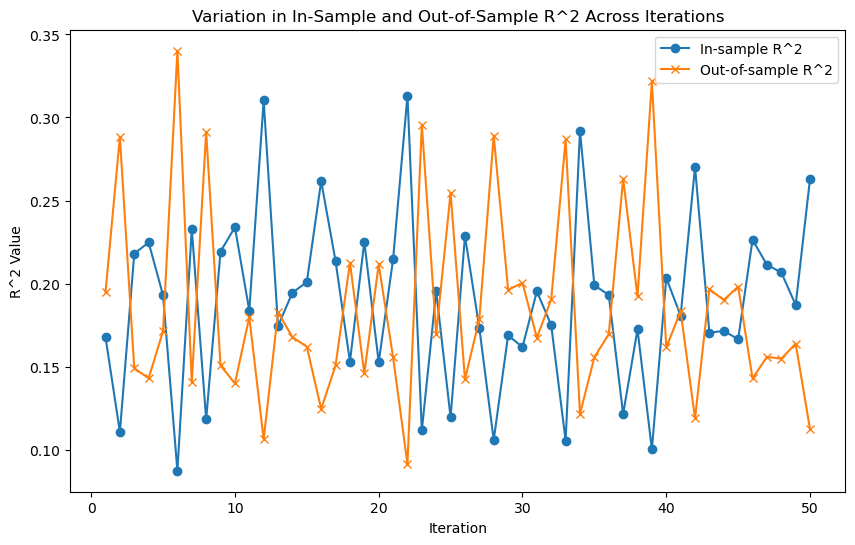

In [14]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Placeholder lists to store in-sample and out-of-sample R^2 values
in_sample_r2 = []
out_of_sample_r2 = []

# Loop to perform 50 iterations with different train-test splits each time
for i in range(50):
    # Split the data without a fixed random seed for different splits in each iteration
    pokeaman_train, pokeaman_test = train_test_split(pokeaman, train_size=0.5)
    
    # Define and fit the model
    model_spec = smf.ols(formula='HP ~ Attack + Defense', data=pokeaman_train)
    model_fit = model_spec.fit()
    
    # Calculate "in-sample" R^2 on training data
    in_sample_r2.append(model_fit.rsquared)
    
    # Calculate "out-of-sample" R^2 on test data
    yhat_test = model_fit.predict(pokeaman_test)
    y_test = pokeaman_test['HP']
    out_of_sample_r2.append(np.corrcoef(y_test, yhat_test)[0, 1] ** 2)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), in_sample_r2, label="In-sample R^2", marker='o')
plt.plot(range(1, 51), out_of_sample_r2, label="Out-of-sample R^2", marker='x')
plt.xlabel("Iteration")
plt.ylabel("R^2 Value")
plt.legend()
plt.title("Variation in In-Sample and Out-of-Sample R^2 Across Iterations")
plt.show()
